<a href="https://colab.research.google.com/github/Sairam901423/MACHINE-LEARNING-PROJECT/blob/main/pr_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear SVM Confusion Matrix:
[[17  0]
 [ 0 13]]

Linear SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

RBF SVM Confusion Matrix:
[[17  0]
 [ 0 13]]

RBF SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



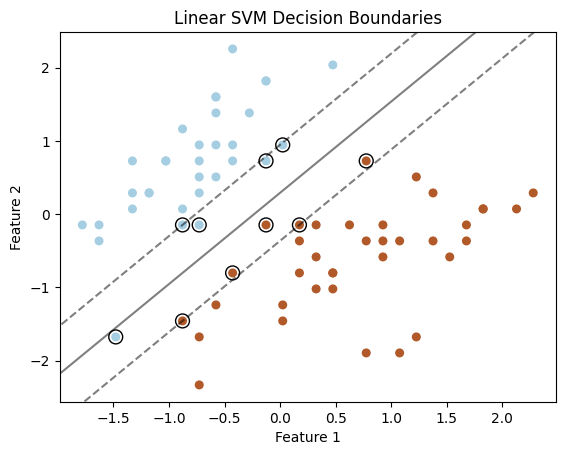

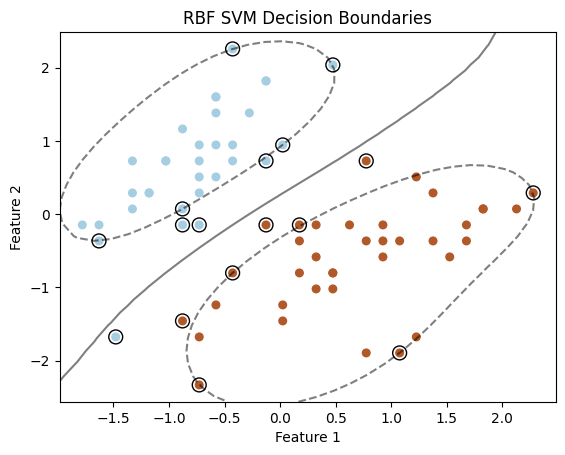

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # We only take the first two features for visualization purposes
y = iris.target

# We will only consider two classes for binary classification
X = X[y != 2]
y = y[y != 2]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create SVM classifiers
svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')

# Train the classifiers
svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

# Make predictions
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluate the classifiers
print("Linear SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_linear))
print("\nLinear SVM Classification Report:")
print(classification_report(y_test, y_pred_linear))

print("RBF SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rbf))
print("\nRBF SVM Classification Report:")
print(classification_report(y_test, y_pred_rbf))

# Plot decision boundaries, hyperplane, and support vectors
def plot_svm_decision_boundaries(X, y, model, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 30),
                         np.linspace(ylim[0], ylim[1], 30))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and margins
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # Plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

# Plot for linear SVM
plot_svm_decision_boundaries(X_train, y_train, svm_linear, "Linear SVM Decision Boundaries")

# Plot for RBF SVM
plot_svm_decision_boundaries(X_train, y_train, svm_rbf, "RBF SVM Decision Boundaries")
